In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
display(df)

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

# Descriptive Statistics

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [19]:
df[df.duplicated(subset='CustomerId', keep = False)]

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

In [21]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Hasil Observasi
Pada Dataset semua tipe data pada setiap kolom sudah sesuai dengan isinya, terdapat tiga tipe data yang ada pada dataset yaitu tipe data integer, float dan object. <br>
Dalam dataset ini juga tidak memiliki data kosong atau null pada setiap kolomnya dan tidak ditemukan data duplikat berdasarkan Customer Id serta tidak ada nilai summary yang aneh.<br>

# Univariate Analysis
Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target).

In [23]:
categ = ['Gender', 'NumOfProducts', 'Geography']
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
str = ['Surname', 'Geography']
boolean = ['HasCrCard', 'IsActiveMember','Exited']

### Visualisasi Data Numerik

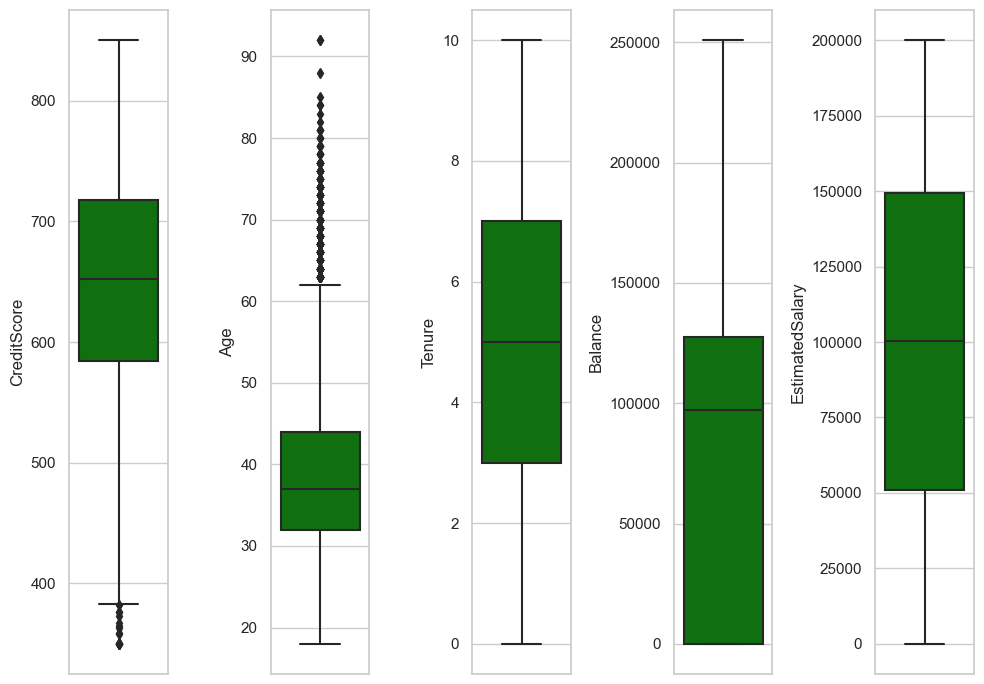

In [40]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Pada visualisasi kolom Age terlihat bahwa terdapat nilai Outlier sehingga tipe distribusinya Positively skewed dan juga dapat dilihat bahwa umur nasabah paling banyak berkisar antara 30 sampai 40 tahun atau usia dewasalah yang paling dominan.<br>

C:\Users\asus\AppData\Local\Temp\ipykernel_11176\946389498.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums[i]], color='green')
C:\Users\asus\AppData\Local\Temp\ipykernel_11176\946389498.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums[i]], color='green')
C:\Users\asus\AppD

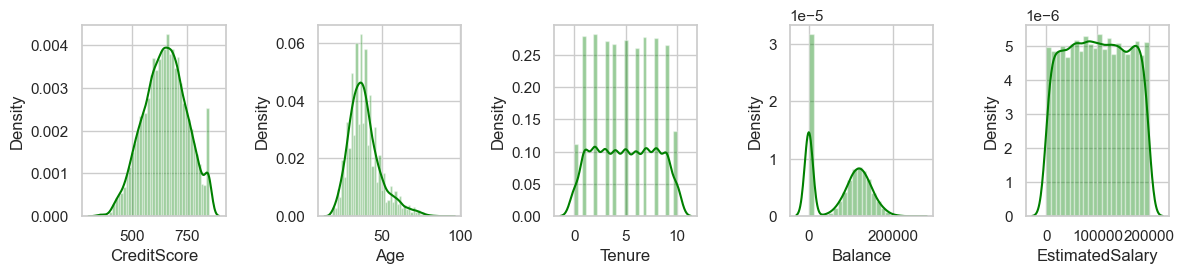

In [41]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.distplot(df[nums[i]], color='green')
    plt.tight_layout()

Pada kolom CreditScore memiliki nilai Outlier sehingga tipe distibusinya adalah negatively skewed dan CreditScore yang paling banyak berkisar antara 580 sampai 720 serta memiliki lonjakan sedikit pada data yang turun.<br>

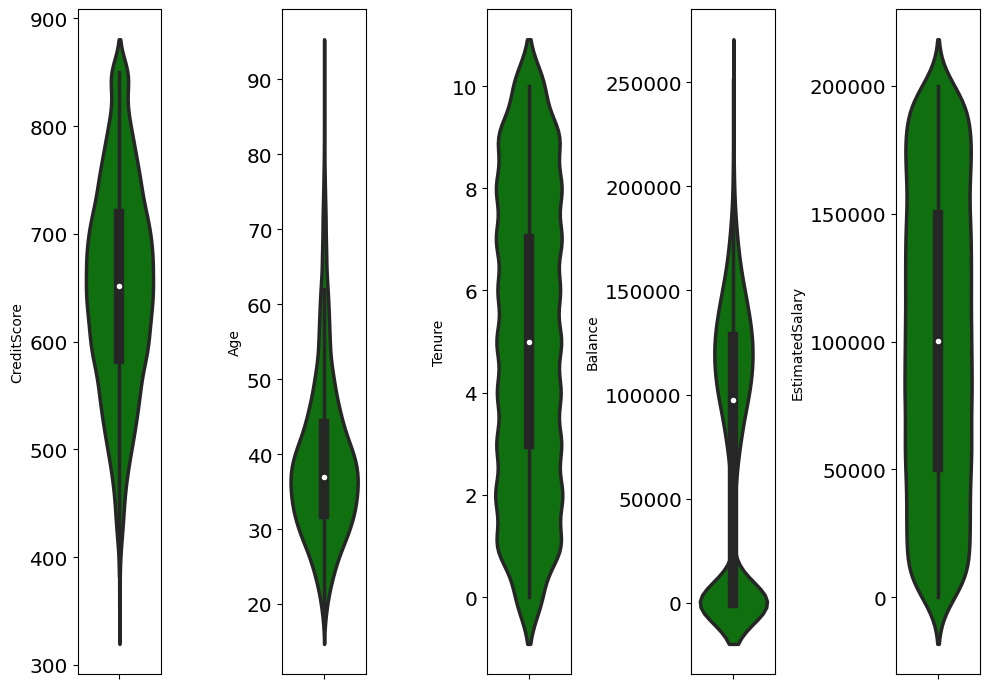

In [24]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Distibusi dari kolom Tenure terlihat normal dan tidak memiliki outlier.<br>
Pada kolom Balance terdapat nilai 0 yang paling mendominasi dari pada jumlah yang lain dan memiliki lonjakan data yang menurun serta naik.<b>
Distibusi dari EstimatedSalary nasabah itu normal dan dapat dilihat bahwa ada EstimatedSalary dari nasabah yang 0 atau tidak ada.<br>

### Visualisasi Data Kategori

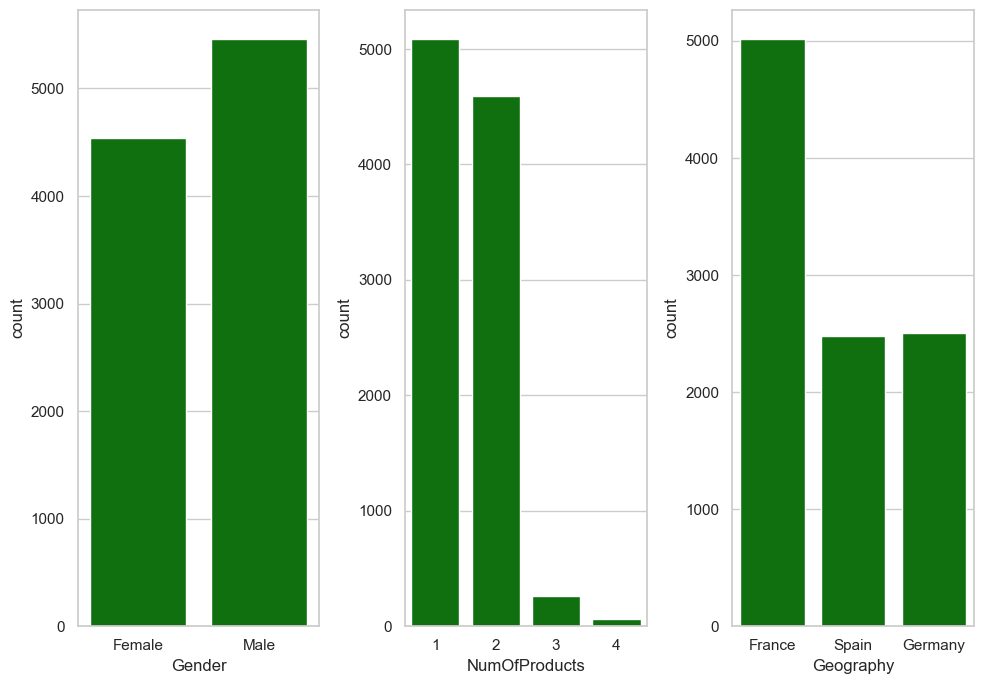

In [43]:
for i in range(0, len(categ)):
    plt.subplot(1, len(categ), 1+i)
    sns.countplot(x=df[categ[i]], color =  'green')
    plt.tight_layout()

Nasabah yang laki-laki lebih mendominasi dibandingkan dengan nasabah Perempuan.<br>
NumOfProducts 1 paling mendominasi dengan jumlah nasabah yang menggunakannya lebih dari 500 nasabah dan yang paling sedikit itu NumOfProducts 4. Serta 50% dari seluruh nasabah berasal dari France.<br>

### Visulisasi Data Booelan

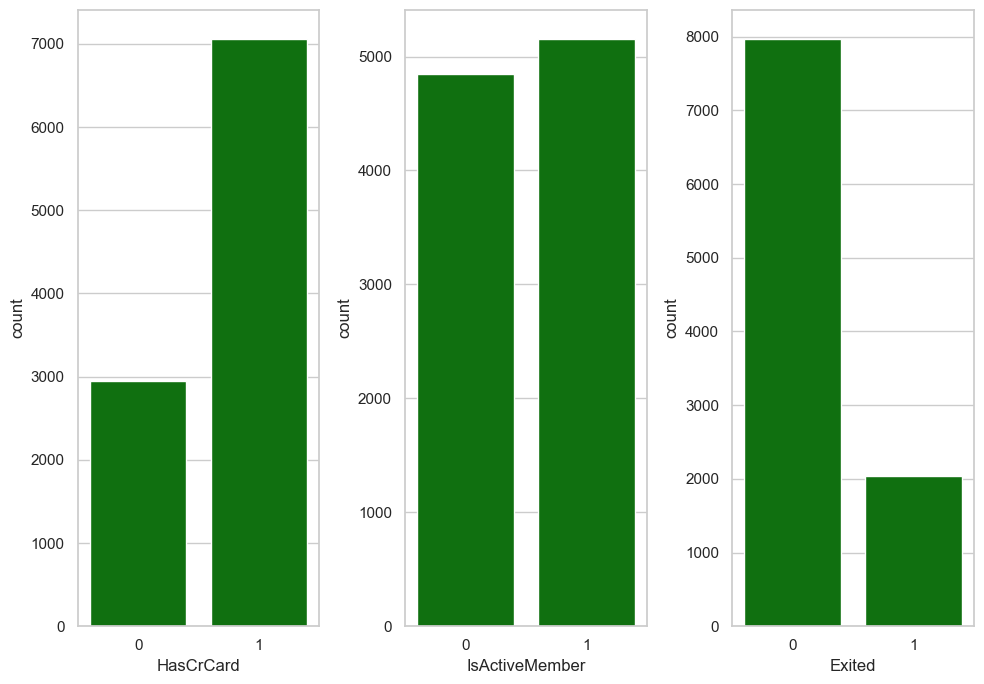

In [44]:
for i in range(0, len(boolean)):
    plt.subplot(1, len(boolean), 1+i)
    sns.countplot(x=df[boolean[i]], color =  'green')
    plt.tight_layout()

### Hasil Observasi

Pada kolom HasCrChard, banyak nasabah yang sudah memiliki kartu kredit.<br>
Pada kolom IsActiveMember dapat dilihat bahwa perbedaan dari Nasabah aktif dan tidak itu sangat sedikit yaitu kisaran 400an saja, namun masih tetap didominasi oleh Nasabah aktif.<br>
Pada kolom Exited, Hampir 80% jumlah nasabah yang masih stay dan 20% selain itu adalah nasabah yang meninggalkan Bank.<br> 

Pada saat melakukan data pre-processing, harus memastikan data tidak memiliki outlier yang tidak normal, baris yang kosong atau tidak digunakan dihapus dan memiliki nilai 0 harus di perbaiki.

## Multivariate Analysis

C:\Users\asus\AppData\Local\Temp\ipykernel_11176\2949887861.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f')


<Axes: >

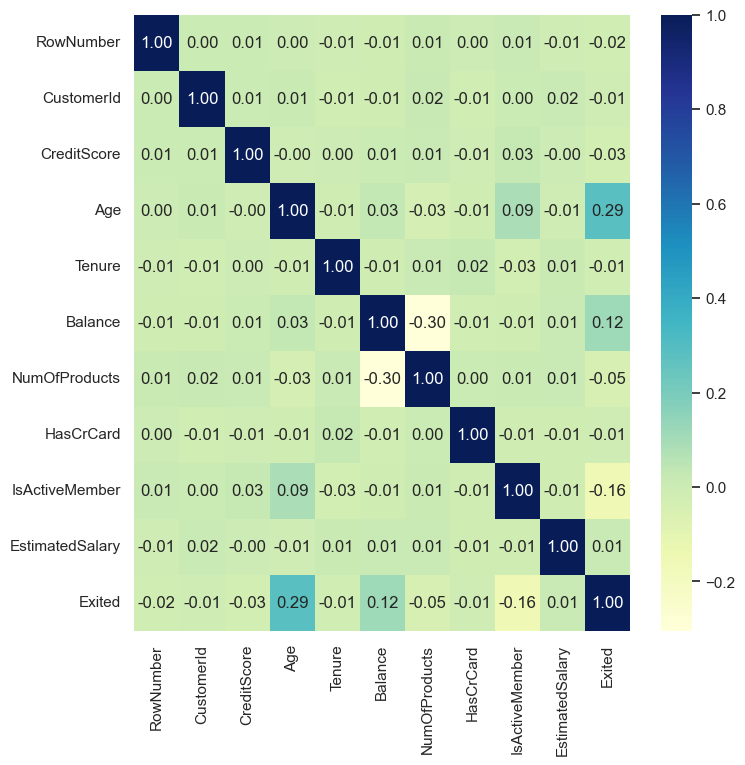

In [45]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f')

<Figure size 1500x1500 with 0 Axes>

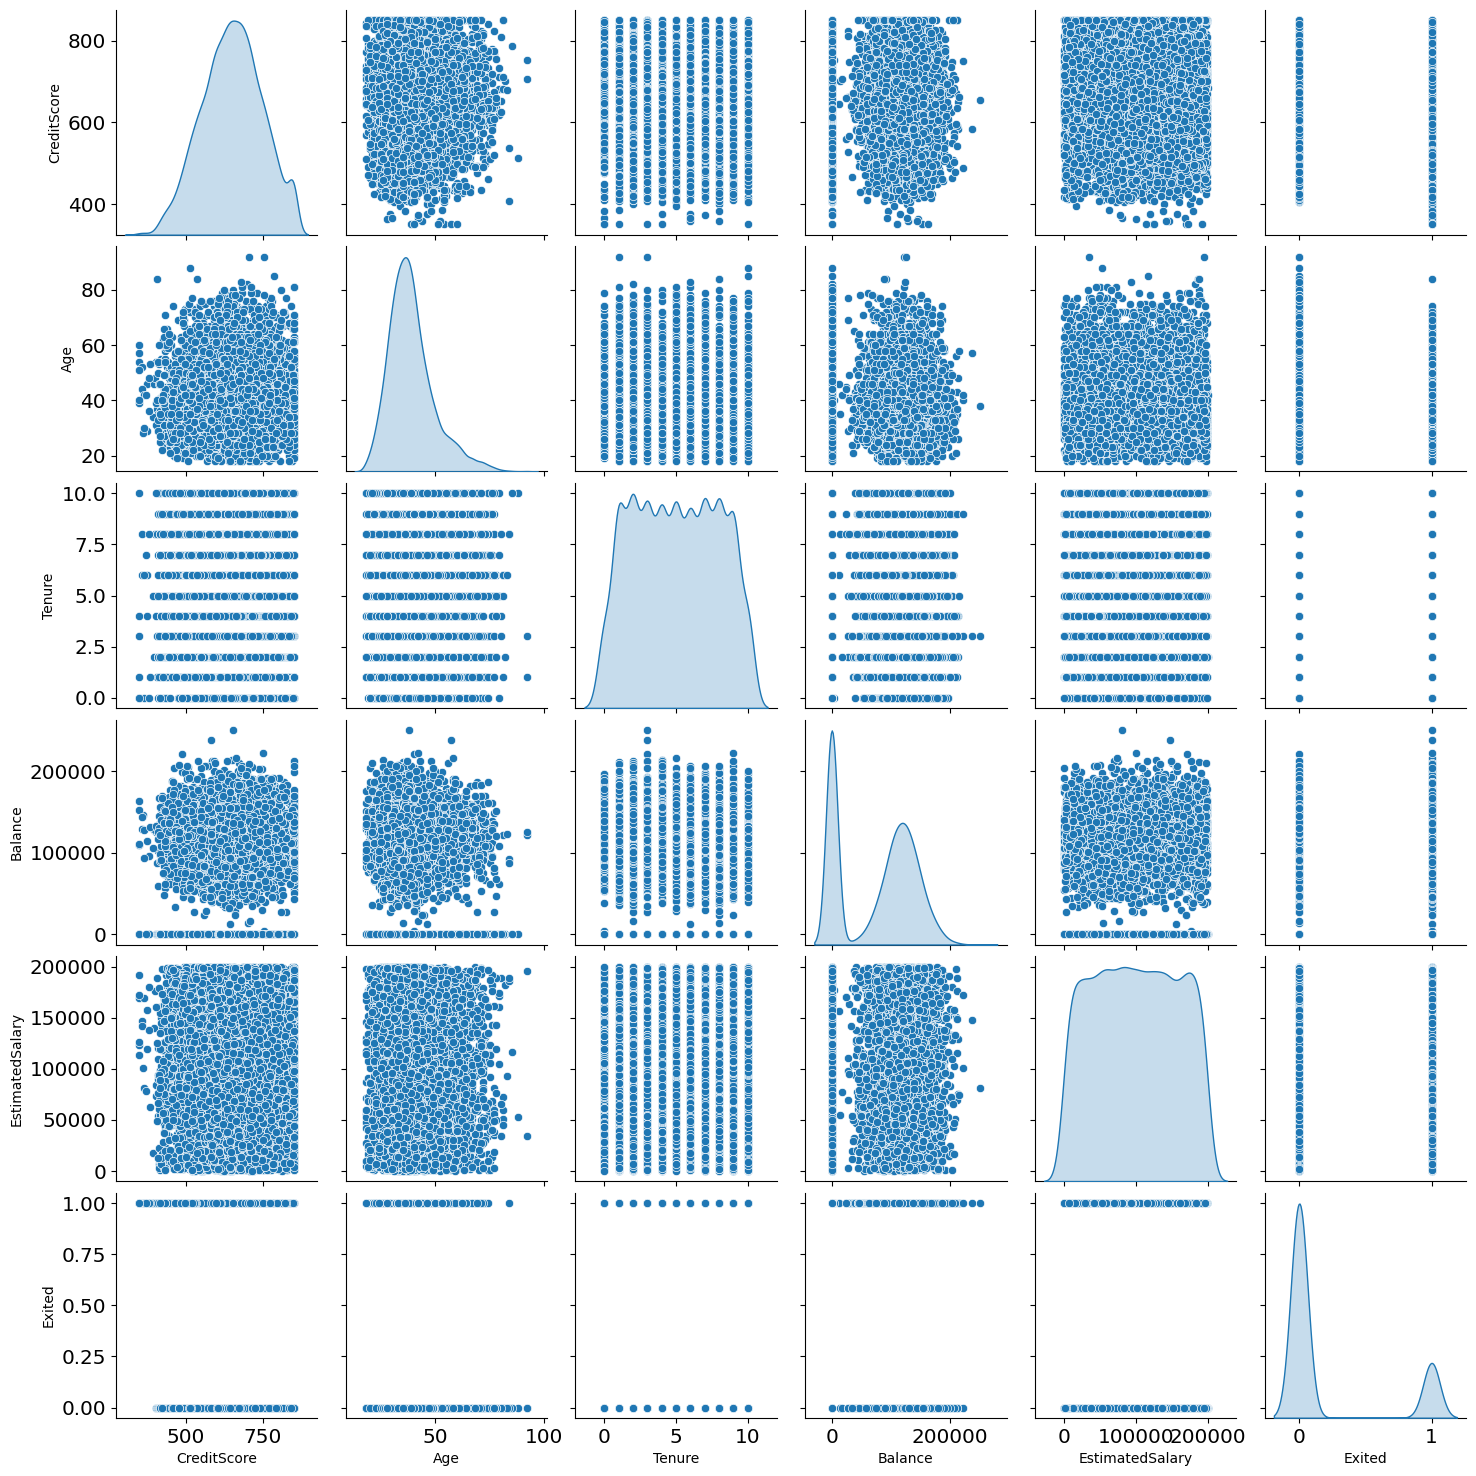

In [9]:
numer = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited']
plt.figure(figsize=(15, 15))
sns.pairplot(df[numer], diag_kind='kde')

<Figure size 1500x1500 with 0 Axes>

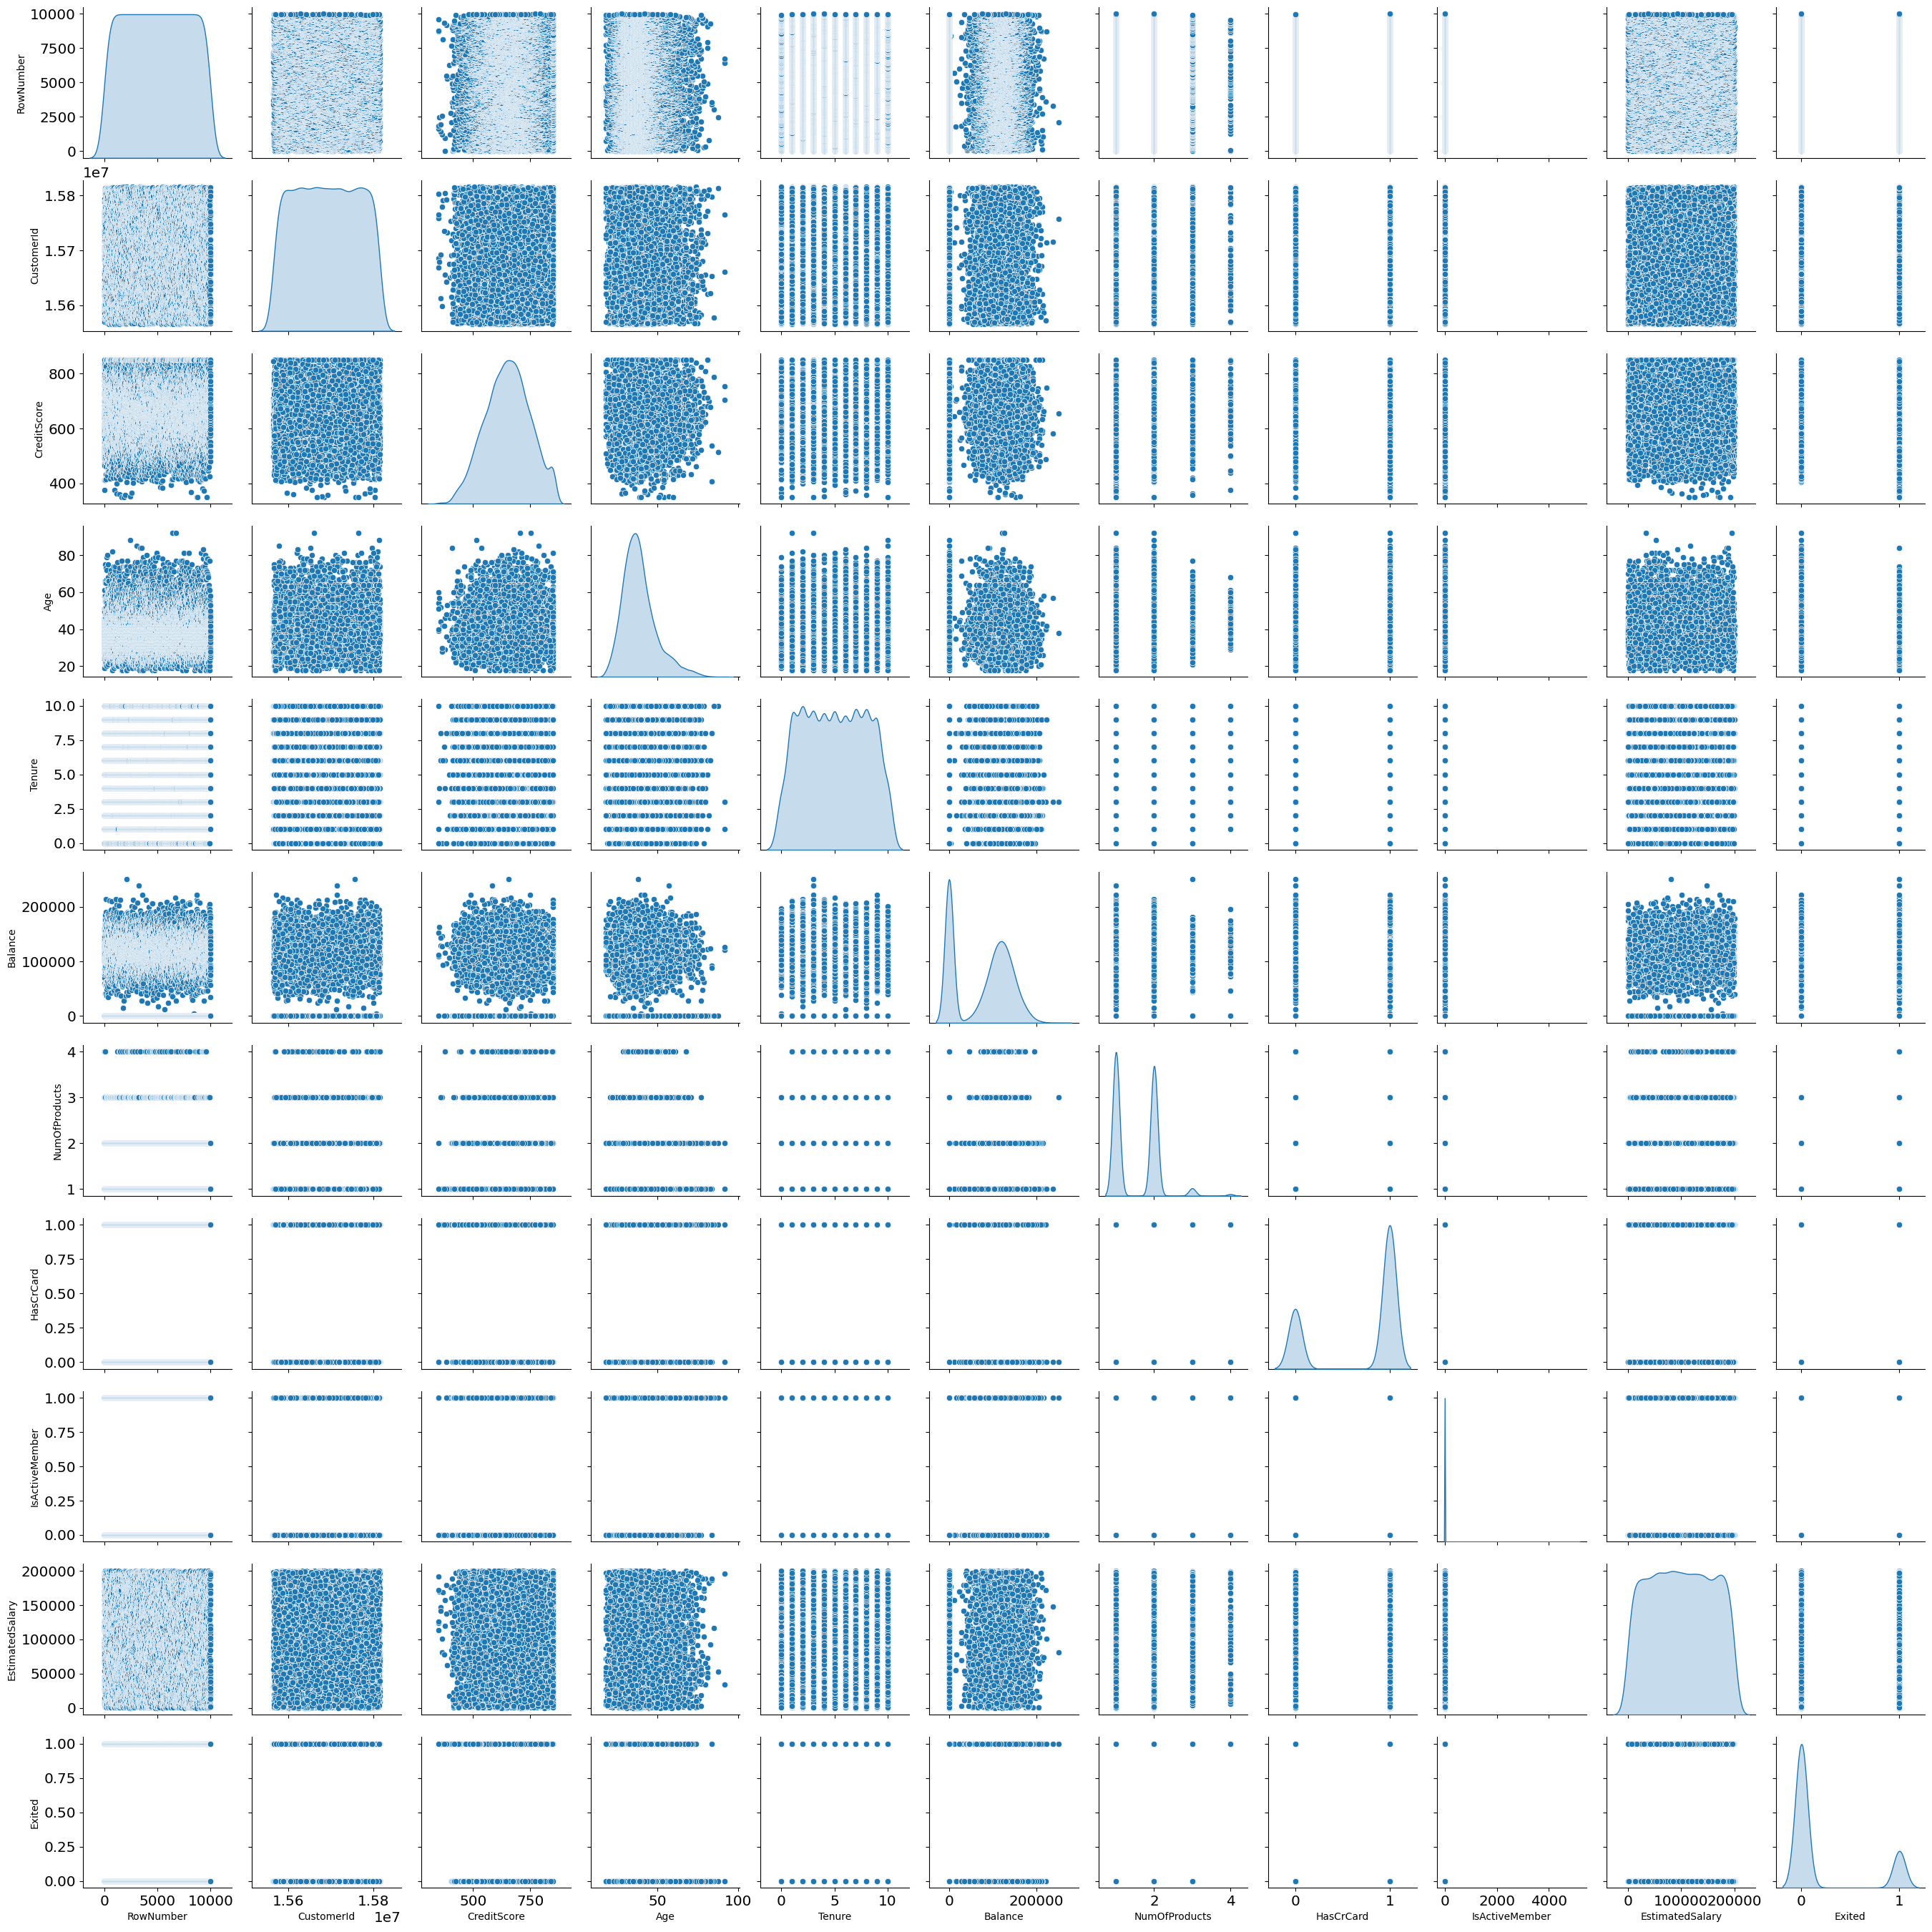

In [12]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

### Hasil Observasi

A. Korelasi antar masing-masing feature dan label tidak semuanya memiliki korelasi yang bearti terhadap label yaitu Exited, seperti feature RowNumber. Selain itu hampir semua feature memiliki korelasi yang kuat terhadap label, namun ada beberapa feature yang harus dipertahankan seperti feature CreditScore, Age, Tenure, Balance dan EstimatedSalary.<br>
B. Korelasi antar feature sangat beragam, ada yang memiliki korelasi yang kuat dan ada juga yang tidak memiliki korelasi yang kuat. Berikut ini kolom-kolom yang memiliki korelasi yang paling kuat yaitu feature Age dan Balance dengan label Exited, feature Age dengan IsActiveMember serta ada beberapa feature yang memiliki korelasi tidak kuat seperti CustomerId dengan NumOfProducts dan EstimatedSalary, HasCrChard dan Tenure. Sedangkan untuk feature yang paling rendah tingkat korelasinya adalah feature NumOfProducts dengan Balance dan feature IsActiveMember dengan Exited. Pada semua feature tidak terlihat memiliki pola yang menarik.

## Business Insight

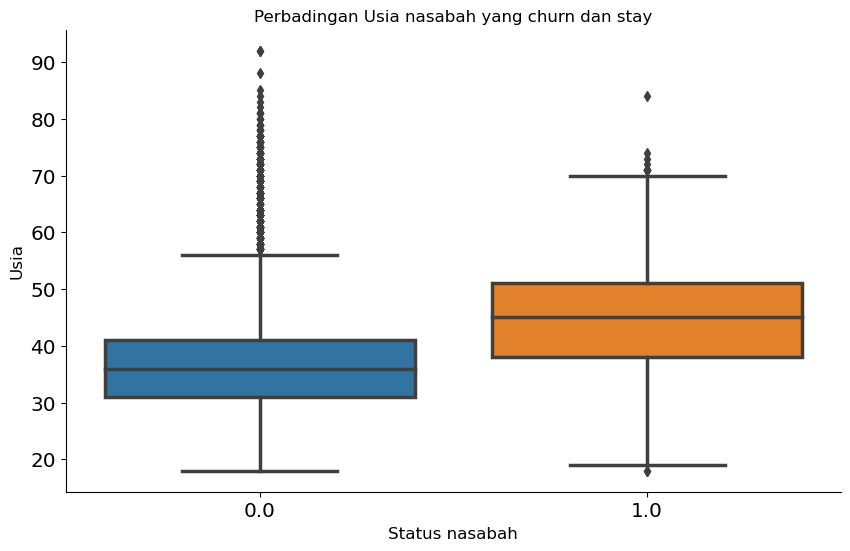

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Exited", y="Age", data=df)
plt.title("Perbadingan Usia nasabah yang churn dan stay")
plt.xlabel("Status nasabah", fontsize = 12)
plt.ylabel("Usia", fontsize = 12)
sns.despine()
plt.show()

Insight = Usia nasabah yang paling banyak Churn termasuk ke dalam kelompok usia dewasa sampai lansia dengan kisaran umur antara 37 - 50 tahun. Sedangkan yang masih tetap stay lebih banyak nasabah dalam usia dewasa yaitu berkisar antara 31 sampai 41 tahun.<br> 
Rekomendasi = Tim produk dan marketing harus berkolaborasi untuk membuat dan menawarkan produk atau layanan yang sesuai dengan kebutuhan kelompok usia dewasa sampai lansia.

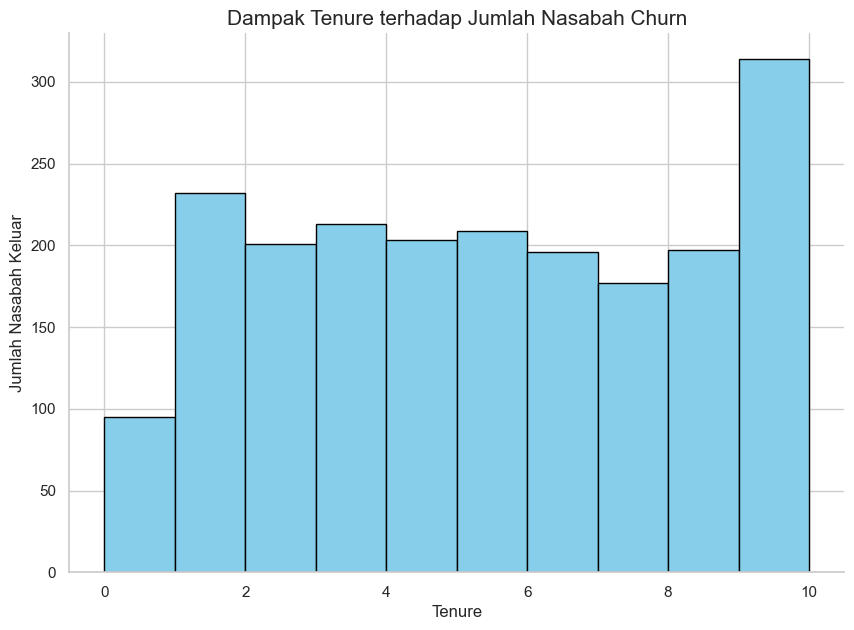

In [31]:
churn = df[df['Exited'] == 1]

plt.hist(churn['Tenure'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Tenure')
plt.ylabel('Jumlah Nasabah Keluar')
plt.title('Dampak Tenure terhadap Jumlah Nasabah Churn', fontsize = 15)
sns.despine()
plt.show()

Insight = Nasabah yang Churn lebih banyak memiliki Tenure 10.<br>
Rekomendasi = Pihak Bank harus meningkatkan pelayanan khusus terhadap nasabah yang memiliki tenure yang tinggi dan dapat membuat promo tertentu agar meningkatkan loyalitas nasabah.

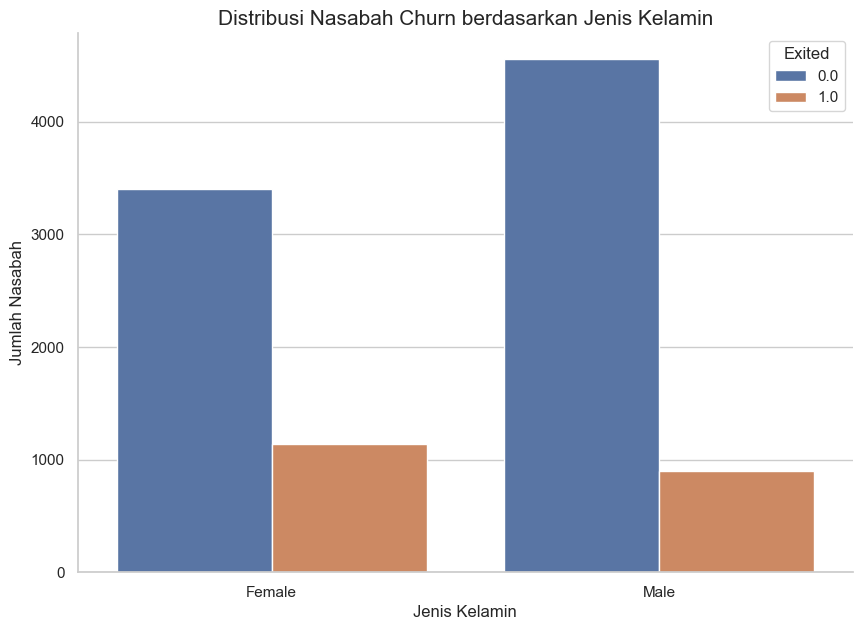

In [32]:
sns.set(style="whitegrid")
sns.countplot(x="Gender", hue="Exited", data=df)
plt.title("Distribusi Nasabah Churn berdasarkan Jenis Kelamin", fontsize = 15)
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Nasabah")
sns.despine()
plt.show()

Insight = Lebih banyak nasabah wanita yang melakukan churn dibandingkan nasabah laki-laki.<br>
Rekomendasi = Pihak Bank harus memperhatikan program khusus bagi setiap nasabah terutama wanita dengan memberikan produk yang sesuai dengan kesukaan wanita dan juga membuat produk untuk menurunkan tingkat nasabah pria yang churn dengan memberikan promo atau layanan khusus bagi setiap nasabah sesuai jenis kelamin.

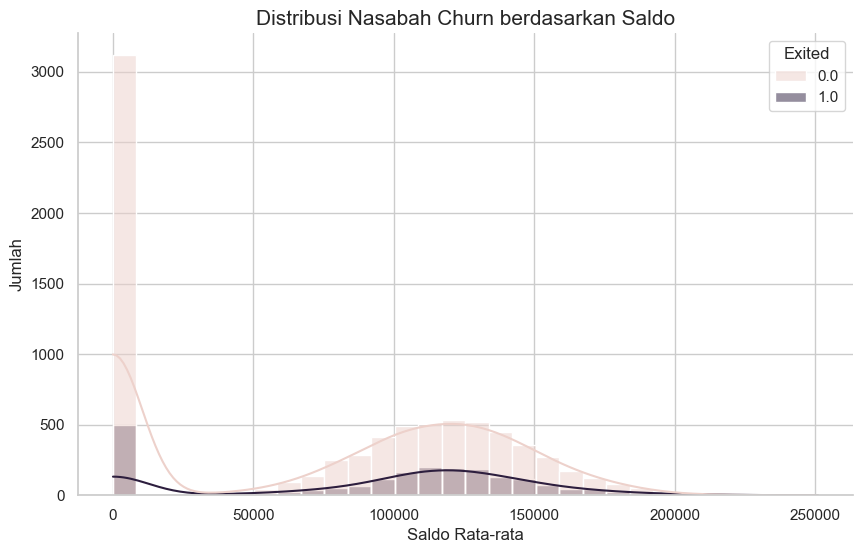

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Balance", hue="Exited", bins=30, kde=True)
plt.title("Distribusi Nasabah Churn berdasarkan Saldo", fontsize = 15)
plt.xlabel("Saldo Rata-rata")
plt.ylabel("Jumlah")
sns.despine()
plt.show()

Insight = Nasabah yang churn paling banyak tidak memiliki Balance.<br>
Rekomendasi = Pihak Bank harus mempertimbangkan untuk meningkatkan layanan atau insentif dan memberikan promosi khusus bagi nasabah yang tidak memiliki Balance.